In [1]:
from nbodykit.lab import *
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

import sys
sys.path.append('../general_routines/')
from general_tools import *
from iterative_reconstruction import *

In [2]:
cosmo = cosmology.Planck15

### Import matter catalog
matter = BigFileCatalog('Matter_catalog.bigfile')

# Define global variables
Length = matter.attrs['BoxSize'][0]
Nc = matter.attrs['Nmesh'][0]
zobs = 0.3
zinit = 3.
r_s = 2.*(Length/Nc) # smoothing radius
print('Smoothing radius=', r_s)

### Import galaxy catalog
galaxy = BigFileCatalog('Galaxy_catalog.bigfile')

bg, bg_std = evaluate_bias(galaxy, matter, return_std=True)
bgRSD, bgRSD_std = evaluate_bias(galaxy, matter, tracer_pos='PositionRSD', return_std=True)

print('bias (real) PRE= {:.2f} +- {:.2f}'.format(bg, bg_std))
print('bias (redshift) PRE= {:.2f} +- {:.2f}'.format(bgRSD, bgRSD_std))

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


Smoothing radius= 7.8125
bias (real) PRE= 1.42 +- 0.01
bias (redshift) PRE= 1.63 +- 0.01


In [3]:
# Valores de formulas (real)
breczinitt = (bg-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bg-1) + (D(zinit)/D(zobs))
print('From real space bias')
print('Expected bias brec(zinit) = {:.2f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.2f}'.format(breczobst))

# Valores de formulas (redshift)
print('From redshift space bias')
breczinitt = (bgRSD-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bgRSD-1) + (D(zinit)/D(zobs))

print('Expected bias brec(zinit) = {:.2f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.2f}'.format(breczobst))

From real space bias
Expected bias brec(zinit) = 2.13
Expected bias brec(zobs) = 0.79
From redshift space bias
Expected bias brec(zinit) = 2.71
Expected bias brec(zobs) = 1.01


In [4]:
s = galaxy['PositionRSD'].compute()
mask_high = s>Length
s[mask_high] = Length
mask_low = s<0.
s[mask_low] = 0.
galaxy['PositionRSD'] = s

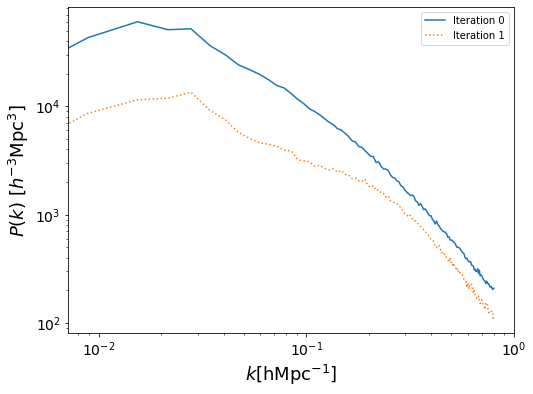

Iteration 1, Mean difference between Pks: 3234.11


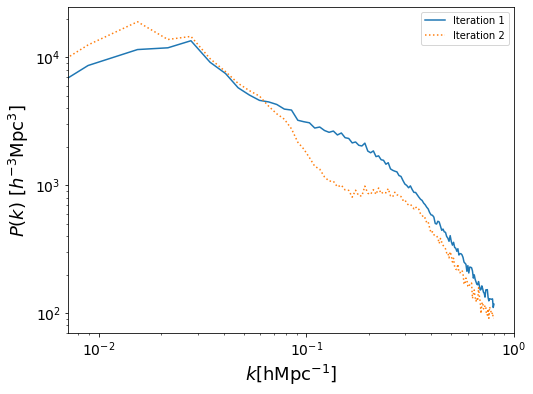

Iteration 2, Mean difference between Pks: 468.37


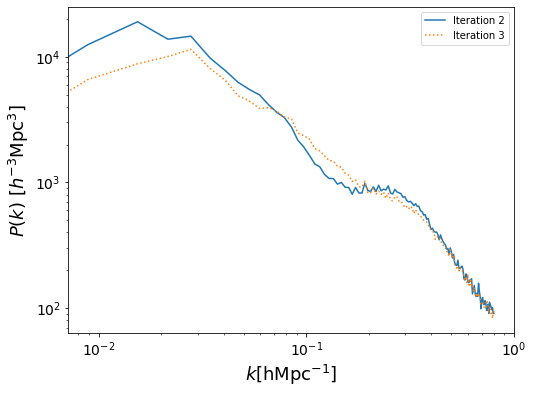

Iteration 3, Mean difference between Pks: 300.69


In [5]:
# From redshift position
iterative_reconstruction(3, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]))

In [6]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 2.06(z=3.00),0.76(z=0.30)
bias (redshift) POST= 2.72(z=3.00),1.01(z=0.30)


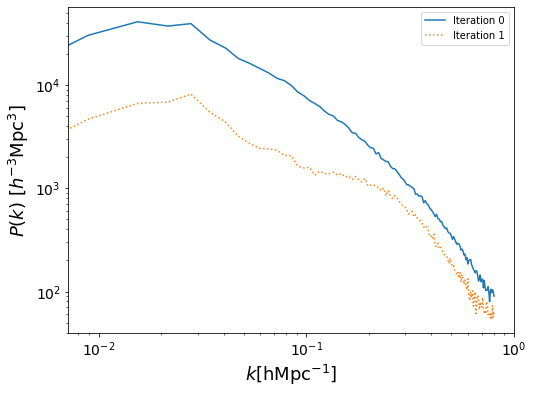

Iteration 1, Mean difference between Pks: 2587.32


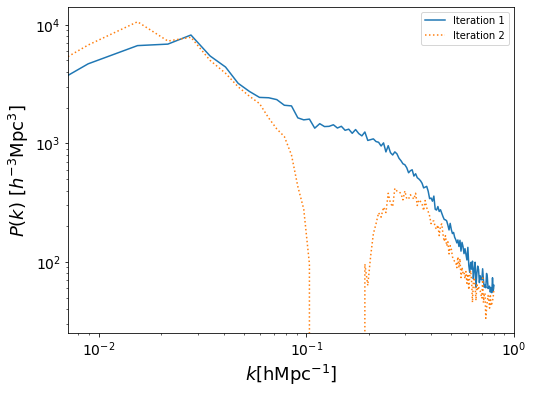

Iteration 2, Mean difference between Pks: 406.21


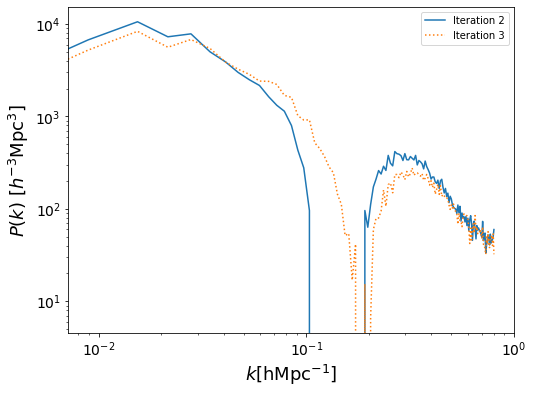

Iteration 3, Mean difference between Pks: 166.78


In [7]:
# From real space position
iterative_reconstruction(3, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), real_space=True)

In [8]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 1.60(z=3.00),0.59(z=0.30)
bias (redshift) POST= 1.85(z=3.00),0.69(z=0.30)
